<a href="https://colab.research.google.com/github/DhayuIntan/2141720026_PCVK_2023/blob/main/week-05/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Membuat Gamma Correction

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


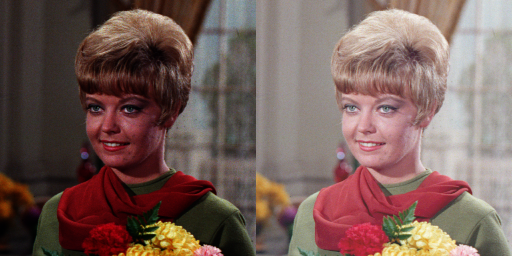

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

#Membuat Simulasi Image Depth

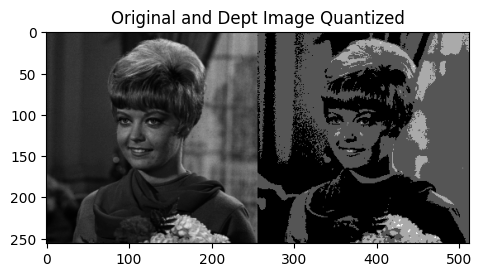

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Load the original grayscale image
original = cv2.imread('drive/MyDrive/Images/female.tiff', cv2.IMREAD_GRAYSCALE)

# Create a depth image with the specified bit depth
depth_image = np.zeros(original.shape, original.dtype)

# Perform image depth using a matrix
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.round(original[y, x] / level) * level

# Display the original and quantized images
plt.figure(figsize=(12, 6))

final_frame = cv2.hconcat([original, depth_image])

# Display the original image with number 1
plt.subplot(1, 2, 1)
plt.imshow(final_frame, cmap='gray')
plt.title('Original and Dept Image Quantized')

plt.show()


#Modul Average Denoising

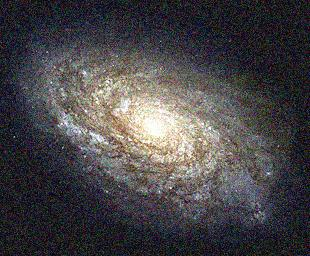

Jumlah citra di average 5
Nilai PSNR: 27.54092353810947 dB


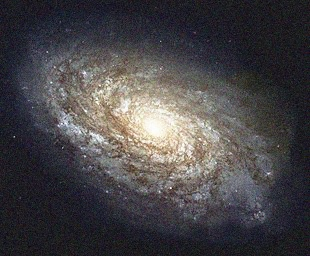

Jumlah citra di average 10
Nilai PSNR: 27.54666024545166 dB


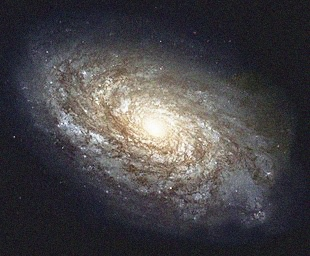

Jumlah citra di average 20
Nilai PSNR: 27.5244724313306 dB


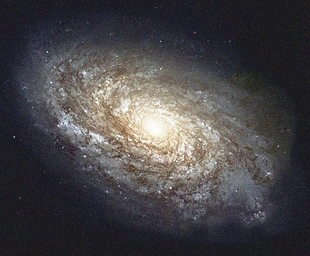

Jumlah citra di average 40
Nilai PSNR: 27.45441262901961 dB


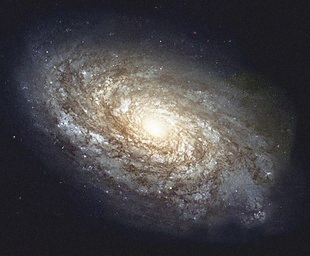

Jumlah citra di average 80
Nilai PSNR: 27.413972936945612 dB


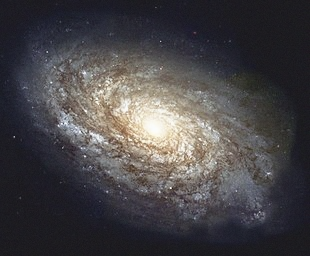

Jumlah citra di average 100
Nilai PSNR: 27.370931279516654 dB


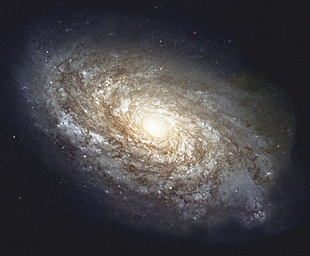

In [21]:
import cv2
import glob
def calculate_psnr(img, nilai):
    mse = np.mean((img - nilai) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def denoise_and_display(jumlah, path):
    print(f'Jumlah citra di average {jumlah}')

    original = cv2.imread(path)
    denoise = np.zeros(original.shape, original.dtype)

    denoising_avg = np.mean(cv_img[:jumlah], axis=0).astype(np.uint8)

    nilai = calculate_psnr(original, denoising_avg)
    print(f"Nilai PSNR: {nilai} dB")

    final_frame = cv2.hconcat((original, denoising_avg))
    cv2_imshow(denoising_avg)

cv_img = []
for img in glob.glob('drive/MyDrive/Images/noises/*.jpg'):
  n = cv2.imread(img)
  cv_img.append(n)

cv2_imshow(cv_img[2])

jml_citra = [5, 10, 20, 40, 80, 100]
path = 'drive/MyDrive/Images/galaxy.jpg'

for counter in jml_citra:
    denoise_and_display(counter, path)

#Membuat image masking

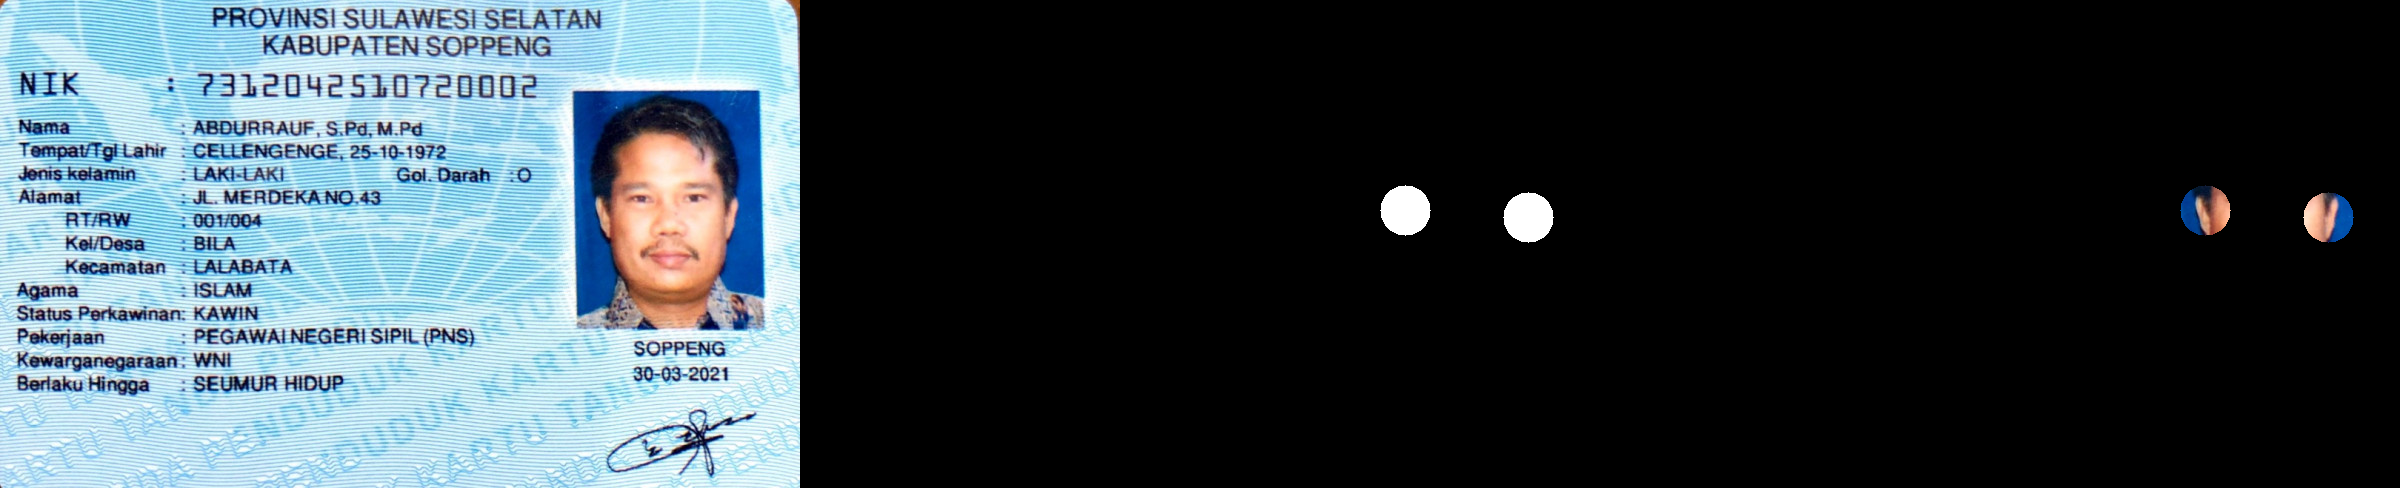

In [57]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = original_image & mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

#Lakukan percobaan menggunakan operator lain

###Operator NOT

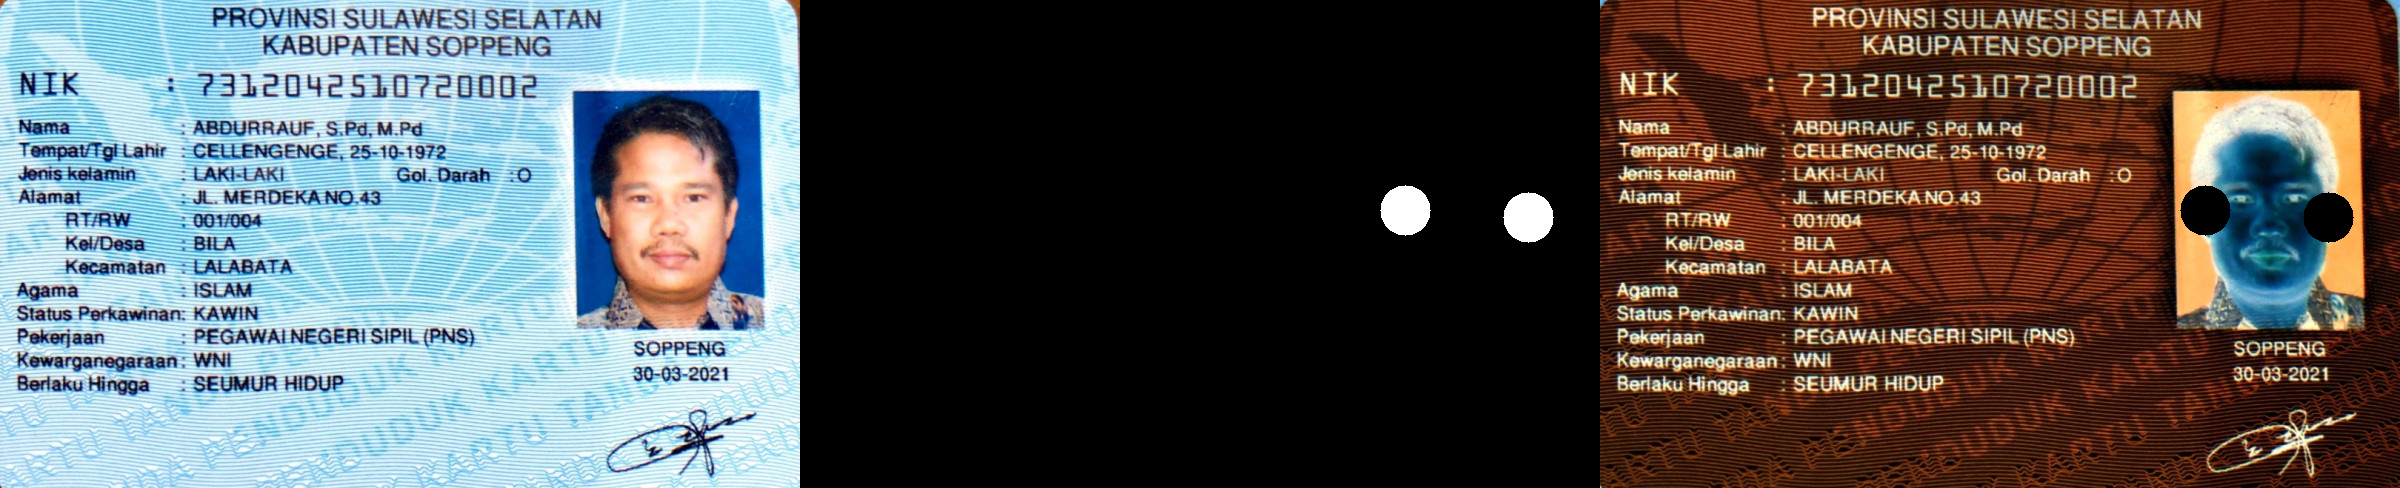

In [65]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = ~original_image & ~mask

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

###Operator OR

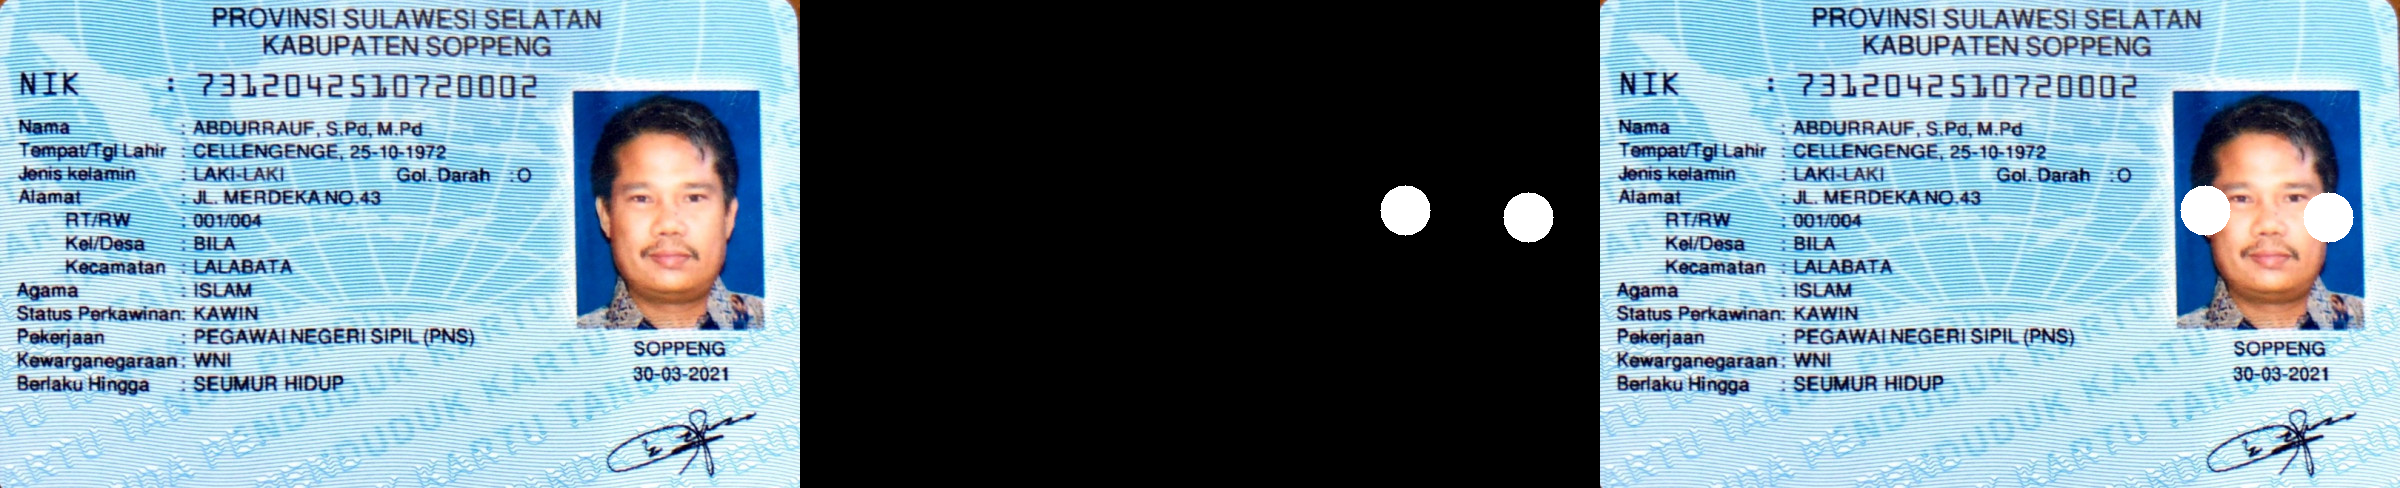

In [66]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_or(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

###Operator AND

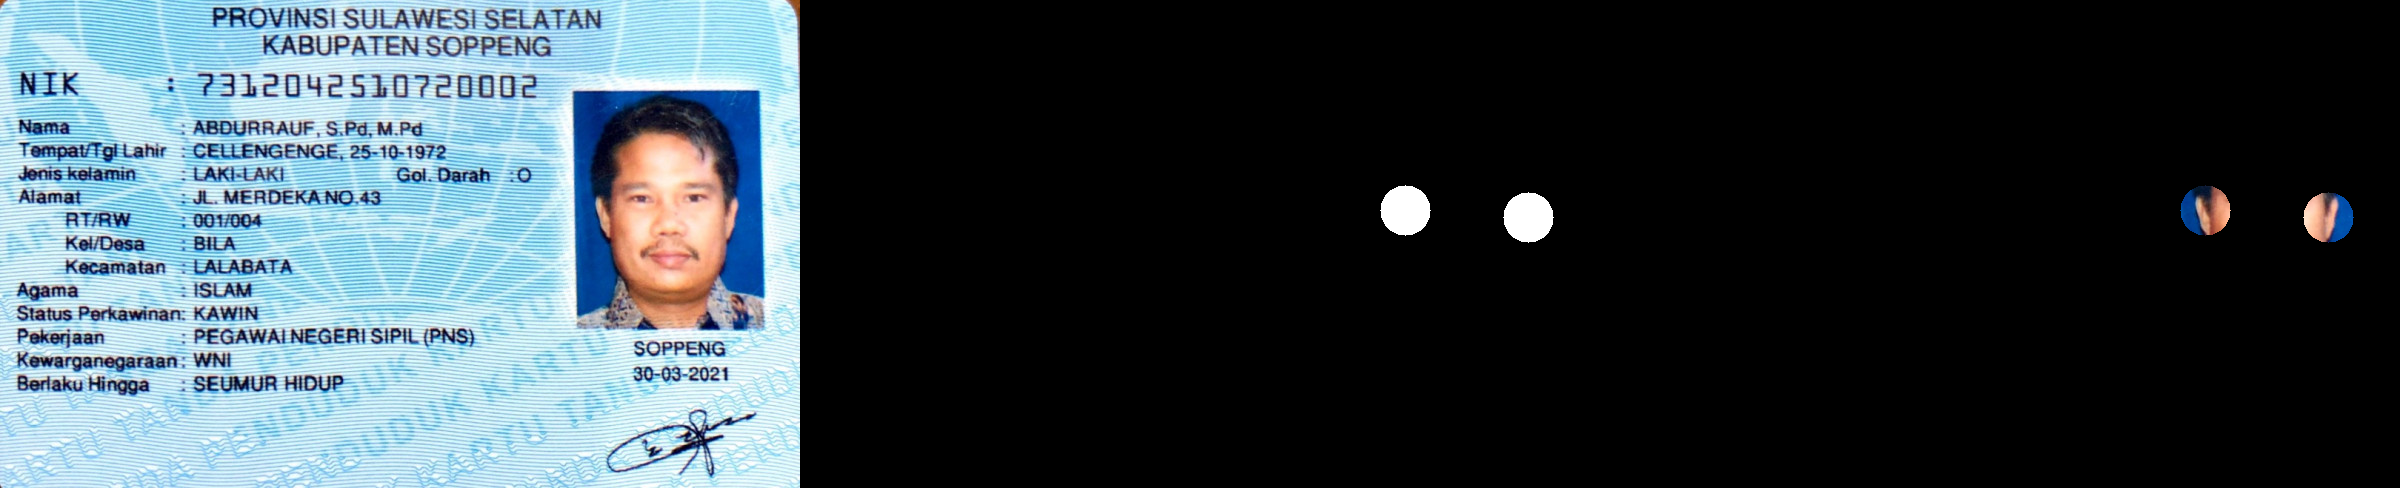

In [67]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_and(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

###Operator NAND

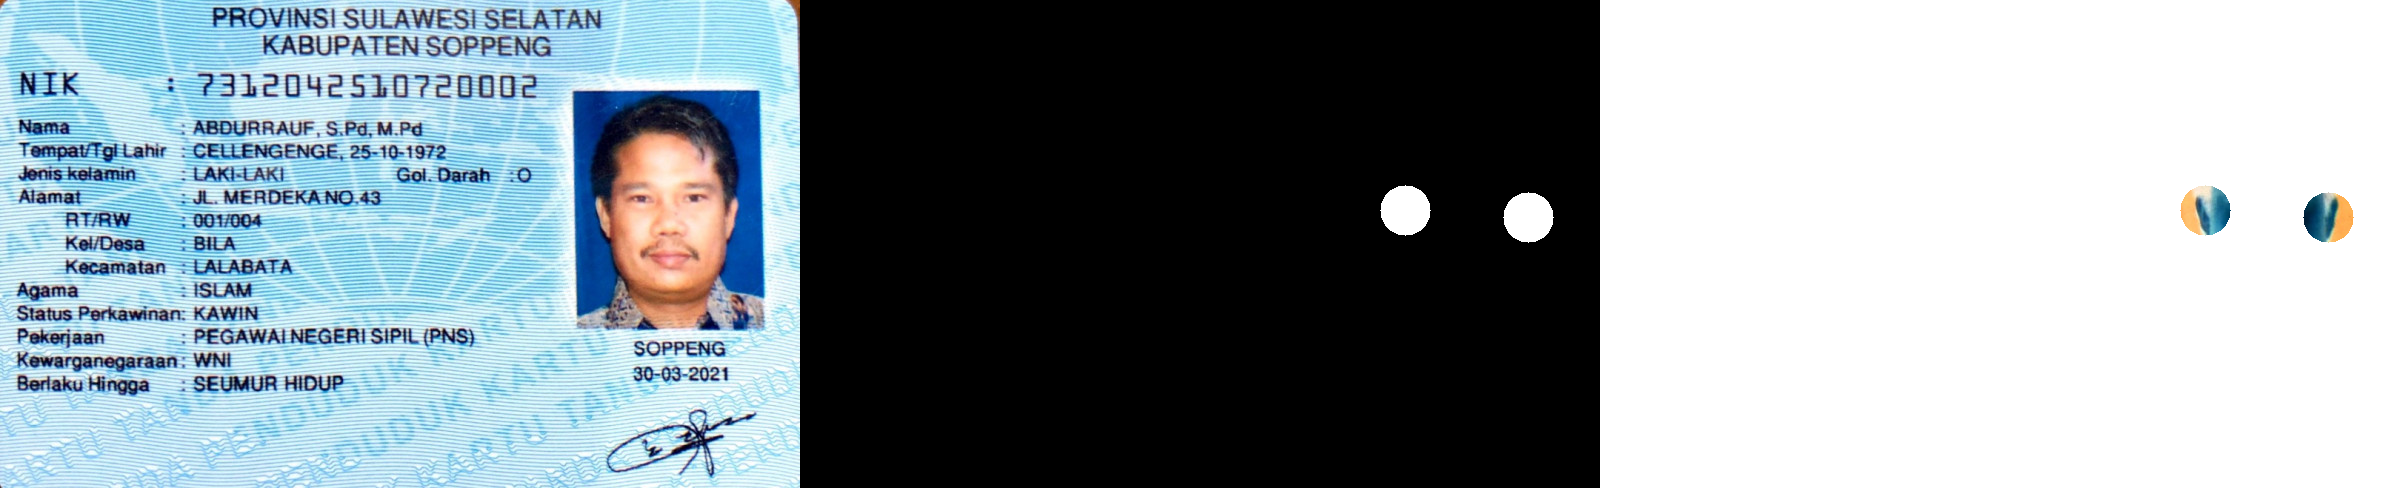

In [70]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_not(cv2.bitwise_and(original_image, mask))

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)

###Operator XOR


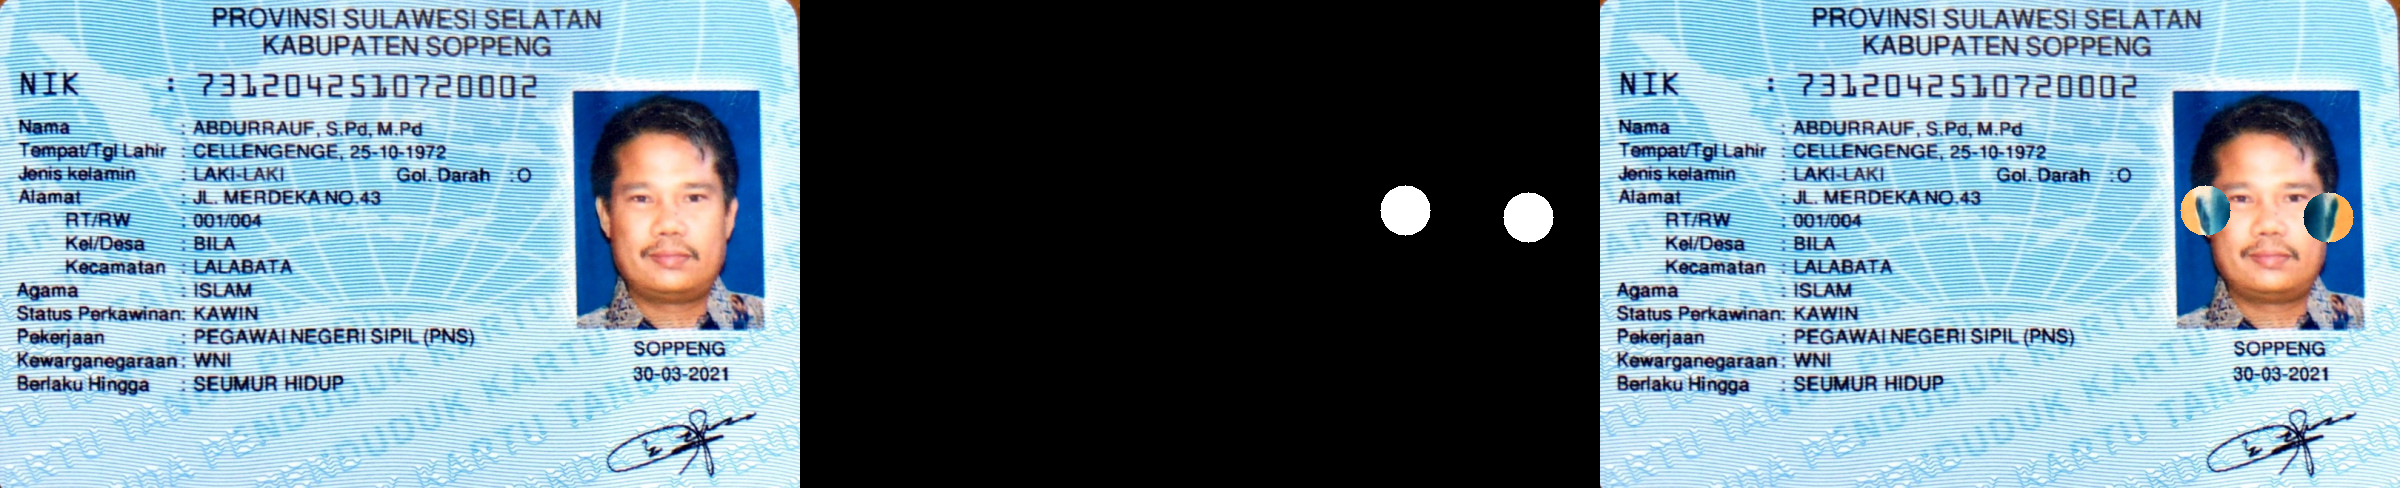

In [71]:
import cv2
import numpy as np

# Membaca gambar asli
original_image = cv2.imread('KTP.jpeg')

# Menentukan pusat dan jari-jari lingkaran pertama
center1 = (605, 210)  # (x, y) coordinates of the center of the first circle
radius1 = 25

# Menentukan pusat dan jari-jari lingkaran kedua
center2 = (728, 217)  # (x, y) coordinates of the center of the second circle
radius2 = 25

# Membuat gambar  kosong
mask = np.zeros(original_image.shape, dtype=np.uint8)

# Gambarlah lingkaran pertama pada mask
cv2.circle(mask, center1, radius1, (255, 255, 255), thickness=-1)  # White circle on black background

# Gambar lingkaran kedua pada mask
cv2.circle(mask, center2, radius2, (255, 255, 255), thickness=-1)  # White circle on black background

masked = cv2.bitwise_xor(original_image, mask)

# Menampilkan gambar asli dan hasilnya
result = cv.hconcat((original_image, mask, masked))
cv2_imshow(result)